<div class="alert alert-info">
  <strong>
Random Forest Classifier- RFC <br>
LinearDiscriminantAnalysis()  - LDA <br>
XGboost - XGB <br>
SVC(gamma='auto') - SVC <br>
GaussianNB() - GNB <br>
DecisionTreeClassifier() - DTC <br>
LogisticRegression(solver='liblinear', multi_class='ovr') - LR <br>
</strong>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix,classification_report,auc,roc_curve,r2_score,confusion_matrix,roc_auc_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
def getPercent(num_a, num_b):
    return (num_a /(num_a + num_b)) * 100

In [3]:
df = pd.read_csv("six variable data set.csv")

In [4]:
vcount = df['class'].value_counts()
vcount

0    2417
1     179
Name: class, dtype: int64

In [5]:
getPercent(vcount[0],vcount[1])

93.10477657935286

In [6]:
X = df.drop('class', axis=1) #1 - columns, 0 - rows
y = df['class']
X = X.to_numpy()
y = y.to_numpy()

In [7]:
oversample = SMOTE(sampling_strategy=0.5385)
over_X, over_y = oversample.fit_resample(X, y)

In [8]:
new_vcount = pd.DataFrame(over_y).value_counts()
new_vcount

0    2417
1    1301
dtype: int64

In [9]:
getPercent(new_vcount[0], new_vcount[1])

65.0080688542227

In [10]:
# splitting the data into 10 folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# RFC

<div class="alert alert-warning">
  <strong>Random Forest Classifer</strong>
</div>

In [11]:
#Build SMOTE SRF model
RFC_model = RandomForestClassifier(n_estimators=150, random_state=0)


lst_accu_stratified = []
for train_index, test_index in skf.split(over_X, over_y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    over_X_train, over_X_test = over_X[train_index], over_X[test_index]
    over_y_train, over_y_test = over_y[train_index], over_y[test_index]
    RFC_model.fit(over_X_train, over_y_train)
    lst_accu_stratified.append(RFC_model.score(over_X_test, over_y_test))
    
lst_accu_stratified

[0.9381720430107527,
 0.9435483870967742,
 0.9381720430107527,
 0.9327956989247311,
 0.9247311827956989,
 0.9435483870967742,
 0.9408602150537635,
 0.9435483870967742,
 0.9326145552560647,
 0.9272237196765498]

In [15]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
RFC_scores = cross_validate(RFC_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(RFC_scores['test_f1']))
print('Mean recall: %.3f' % mean(RFC_scores['test_recall']))
print('Mean precision: %.3f' % mean(RFC_scores['test_precision']))

#accuracy score
RFC_accuracy_scores = cross_val_score(RFC_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {RFC_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(RFC_accuracy_scores.mean())}')

Mean f1: 0.906
Mean recall: 0.872
Mean precision: 0.943


Scores for each fold are: [0.93010753 0.91666667 0.94623656 0.94623656 0.91666667 0.93817204
 0.95430108 0.95698925 0.93800539 0.93530997]

Average score: 0.937869171


In [16]:
#SMOTE SRF prediction result
RFC_y_pred = RFC_model.predict(over_X_test)
pdf = pd.DataFrame(RFC_y_pred)
pdf.value_counts()

0    251
1    120
dtype: int64

# LDA

<div class="alert alert-warning">
  <strong>Linear Discriminant Analysis</strong>
</div>

In [29]:
#Build SMOTE SRF model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model = LinearDiscriminantAnalysis()


lst_accu_stratified = []
for train_index, test_index in skf.split(over_X, over_y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    over_X_train, over_X_test = over_X[train_index], over_X[test_index]
    over_y_train, over_y_test = over_y[train_index], over_y[test_index]
    LDA_model.fit(over_X_train, over_y_train)
    lst_accu_stratified.append(LDA_model.score(over_X_test, over_y_test))
    
lst_accu_stratified

[0.6586021505376344,
 0.6881720430107527,
 0.6693548387096774,
 0.7123655913978495,
 0.6881720430107527,
 0.6666666666666666,
 0.7123655913978495,
 0.6989247311827957,
 0.6819407008086253,
 0.6549865229110512]

In [30]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
LDA_scores = cross_validate(LDA_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(LDA_scores['test_f1']))
print('Mean recall: %.3f' % mean(LDA_scores['test_recall']))
print('Mean precision: %.3f' % mean(LDA_scores['test_precision']))

#accuracy score
LDA_accuracy_scores = cross_val_score(LDA_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {LDA_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(LDA_accuracy_scores.mean())}')

Mean f1: 0.454
Mean recall: 0.373
Mean precision: 0.582


Scores for each fold are: [0.65860215 0.68817204 0.66935484 0.71236559 0.68817204 0.66666667
 0.71236559 0.69892473 0.6819407  0.65498652]

Average score: 0.683155088


In [31]:
#SMOTE SRF prediction result
LDA_y_pred = LDA_model.predict(over_X_test)
pdf = pd.DataFrame(LDA_y_pred)
pdf.value_counts()

0    287
1     84
dtype: int64

# XGB

<div class="alert alert-warning">
  <strong>XGboost</strong>
</div>

In [35]:
#Build SMOTE SRF model
from xgboost import XGBClassifier,plot_importance
XGB_model = XGBClassifier()


lst_accu_stratified = []
for train_index, test_index in skf.split(over_X, over_y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    over_X_train, over_X_test = over_X[train_index], over_X[test_index]
    over_y_train, over_y_test = over_y[train_index], over_y[test_index]
    XGB_model.fit(over_X_train, over_y_train)
    lst_accu_stratified.append(XGB_model.score(over_X_test, over_y_test))
    
lst_accu_stratified

[0.9086021505376344,
 0.946236559139785,
 0.9408602150537635,
 0.9327956989247311,
 0.9220430107526881,
 0.9193548387096774,
 0.946236559139785,
 0.946236559139785,
 0.9460916442048517,
 0.9056603773584906]

In [36]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
XGB_scores = cross_validate(XGB_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(XGB_scores['test_f1']))
print('Mean recall: %.3f' % mean(XGB_scores['test_recall']))
print('Mean precision: %.3f' % mean(XGB_scores['test_precision']))

#accuracy score
XGB_accuracy_scores = cross_val_score(XGB_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {XGB_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(XGB_accuracy_scores.mean())}')

Mean f1: 0.904
Mean recall: 0.868
Mean precision: 0.944


Scores for each fold are: [0.90860215 0.94623656 0.94086022 0.9327957  0.92204301 0.91935484
 0.94623656 0.94623656 0.94609164 0.90566038]

Average score: 0.931411761


In [37]:
#SMOTE SRF prediction result
XGB_y_pred = XGB_model.predict(over_X_test)
pdf = pd.DataFrame(XGB_y_pred)
pdf.value_counts()

0    254
1    117
dtype: int64

# SVC

<div class="alert alert-warning">
  <strong>Support Vector Classification</strong>
</div>

In [64]:
#Build SMOTE SRF model
from sklearn.svm import SVC
from sklearn import svm
SVC_model = svm.SVC(kernel= 'linear',C=0.1)


lst_accu_stratified = []
for train_index, test_index in skf.split(over_X, over_y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    over_X_train, over_X_test = over_X[train_index], over_X[test_index]
    over_y_train, over_y_test = over_y[train_index], over_y[test_index]
    SVC_model.fit(over_X_train, over_y_train)
    lst_accu_stratified.append(SVC_model.score(over_X_test, over_y_test))
    
lst_accu_stratified

[0.6532258064516129,
 0.6854838709677419,
 0.6559139784946236,
 0.7150537634408602,
 0.6720430107526881,
 0.6693548387096774,
 0.6989247311827957,
 0.6908602150537635,
 0.6738544474393531,
 0.6576819407008087]

In [65]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
SVC_scores = cross_validate(SVC_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(SVC_scores['test_f1']))
print('Mean recall: %.3f' % mean(SVC_scores['test_recall']))
print('Mean precision: %.3f' % mean(SVC_scores['test_precision']))

#accuracy score
SVC_accuracy_scores = cross_val_score(SVC_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {SVC_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(SVC_accuracy_scores.mean())}')

Mean f1: 0.382
Mean recall: 0.285
Mean precision: 0.589


Scores for each fold are: [0.65322581 0.68548387 0.65591398 0.71505376 0.67204301 0.66935484
 0.69892473 0.69086022 0.67385445 0.65768194]

Average score: 0.677239660


In [66]:
#SMOTE SRF prediction result
SVC_y_pred = SVC_model.predict(over_X_test)
pdf = pd.DataFrame(SVC_y_pred)
pdf.value_counts()

0    304
1     67
dtype: int64

# GNB

<div class="alert alert-warning">
  <strong>GaussianNB</strong>
</div>

In [56]:
#Build SMOTE SRF model
from sklearn.naive_bayes import GaussianNB
GNB_model = GaussianNB()


lst_accu_stratified = []
for train_index, test_index in skf.split(over_X, over_y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    over_X_train, over_X_test = over_X[train_index], over_X[test_index]
    over_y_train, over_y_test = over_y[train_index], over_y[test_index]
    GNB_model.fit(over_X_train, over_y_train)
    lst_accu_stratified.append(GNB_model.score(over_X_test, over_y_test))
    
lst_accu_stratified

[0.6935483870967742,
 0.7150537634408602,
 0.6774193548387096,
 0.7661290322580645,
 0.7016129032258065,
 0.6801075268817204,
 0.7473118279569892,
 0.6827956989247311,
 0.7196765498652291,
 0.6873315363881402]

In [57]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
GNB_scores = cross_validate(GNB_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(GNB_scores['test_f1']))
print('Mean recall: %.3f' % mean(GNB_scores['test_recall']))
print('Mean precision: %.3f' % mean(GNB_scores['test_precision']))

#accuracy score
GNB_accuracy_scores = cross_val_score(GNB_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {GNB_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(GNB_accuracy_scores.mean())}')

Mean f1: 0.538
Mean recall: 0.487
Mean precision: 0.603


Scores for each fold are: [0.69354839 0.71505376 0.67741935 0.76612903 0.7016129  0.68010753
 0.74731183 0.6827957  0.71967655 0.68733154]

Average score: 0.707098658


In [58]:
#SMOTE SRF prediction result
GNB_y_pred = GNB_model.predict(over_X_test)
pdf = pd.DataFrame(GNB_y_pred)
pdf.value_counts()

0    265
1    106
dtype: int64

# DTC

<div class="alert alert-warning">
  <strong>DecisionTreeClassifier</strong>
</div>

In [49]:
#Build SMOTE SRF model
from sklearn.tree import DecisionTreeClassifier
DTC_model = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)


lst_accu_stratified = []
for train_index, test_index in skf.split(over_X, over_y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    over_X_train, over_X_test = over_X[train_index], over_X[test_index]
    over_y_train, over_y_test = over_y[train_index], over_y[test_index]
    DTC_model.fit(over_X_train, over_y_train)
    lst_accu_stratified.append(DTC_model.score(over_X_test, over_y_test))
    
lst_accu_stratified

[0.7580645161290323,
 0.7661290322580645,
 0.8252688172043011,
 0.7741935483870968,
 0.7956989247311828,
 0.7526881720430108,
 0.8010752688172043,
 0.8172043010752689,
 0.7735849056603774,
 0.8113207547169812]

In [50]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
DTC_scores = cross_validate(DTC_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(DTC_scores['test_f1']))
print('Mean recall: %.3f' % mean(DTC_scores['test_recall']))
print('Mean precision: %.3f' % mean(DTC_scores['test_precision']))

#accuracy score
DTC_accuracy_scores = cross_val_score(DTC_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {DTC_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(DTC_accuracy_scores.mean())}')

Mean f1: 0.664
Mean recall: 0.602
Mean precision: 0.786


Scores for each fold are: [0.75806452 0.76612903 0.82526882 0.77419355 0.79569892 0.75268817
 0.80107527 0.8172043  0.77358491 0.81132075]

Average score: 0.787522824


In [54]:
#SMOTE SRF prediction result
DTC_y_pred = DTC_model.predict(over_X_test)
pdf = pd.DataFrame(DTC_y_pred)
pdf.value_counts()

0    311
1     60
dtype: int64

# model selection

### Random forest model

In [41]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
RFC_scores = cross_validate(RFC_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(RFC_scores['test_f1']))
print('Mean recall: %.3f' % mean(RFC_scores['test_recall']))
print('Mean precision: %.3f' % mean(RFC_scores['test_precision']))

#accuracy score
RFC_accuracy_scores = cross_val_score(RFC_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {RFC_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(RFC_accuracy_scores.mean())}')


Mean f1: 0.910
Mean recall: 0.875
Mean precision: 0.948


Scores for each fold are: [0.91666667 0.94354839 0.94892473 0.93817204 0.93010753 0.9327957
 0.94086022 0.94892473 0.9541779  0.93261456]

Average score: 0.938679245


In [42]:
RFC_y_pred = RFC_y_pred.round(0)
RFC_y_pred.astype("int64")

print(classification_report(RFC_y_pred, over_y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       256
           1       0.85      0.96      0.90       115

    accuracy                           0.93       371
   macro avg       0.91      0.94      0.92       371
weighted avg       0.94      0.93      0.93       371



In [17]:
roc_auc_score(over_y_test,RFC_model.predict_proba(over_X_test)[:, 1])

0.9710341525694224

C:\Users\Tinul Piumika\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


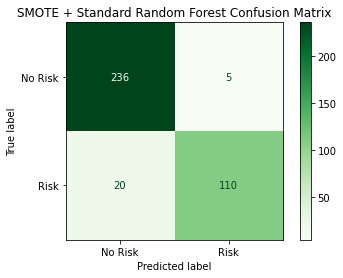

In [43]:
#Create confusion matrix
fig = plot_confusion_matrix(RFC_model, over_X_test, over_y_test, display_labels=['No Risk', 'Risk'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

### Linear Discriminant Analysis

In [44]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
LDA_scores = cross_validate(LDA_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(LDA_scores['test_f1']))
print('Mean recall: %.3f' % mean(LDA_scores['test_recall']))
print('Mean precision: %.3f' % mean(LDA_scores['test_precision']))

#accuracy score
LDA_accuracy_scores = cross_val_score(LDA_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {LDA_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(LDA_accuracy_scores.mean())}')


Mean f1: 0.454
Mean recall: 0.373
Mean precision: 0.582


Scores for each fold are: [0.65860215 0.68817204 0.66935484 0.71236559 0.68817204 0.66666667
 0.71236559 0.69892473 0.6819407  0.65498652]

Average score: 0.683155088


In [45]:
LDA_y_pred = LDA_y_pred.round(0)
LDA_y_pred.astype("int64")

print(classification_report(LDA_y_pred, over_y_test))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       287
           1       0.33      0.51      0.40        84

    accuracy                           0.65       371
   macro avg       0.58      0.60      0.58       371
weighted avg       0.72      0.65      0.68       371



C:\Users\Tinul Piumika\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


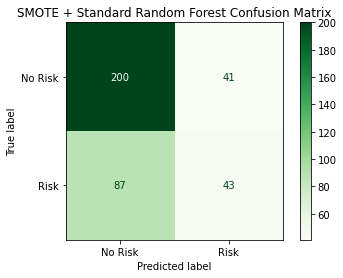

In [46]:
#Create confusion matrix
fig = plot_confusion_matrix(LDA_model, over_X_test, over_y_test, display_labels=['No Risk', 'Risk'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

### XGboost

In [47]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
XGB_scores = cross_validate(XGB_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(XGB_scores['test_f1']))
print('Mean recall: %.3f' % mean(XGB_scores['test_recall']))
print('Mean precision: %.3f' % mean(XGB_scores['test_precision']))

#accuracy score
XGB_accuracy_scores = cross_val_score(XGB_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {XGB_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(XGB_accuracy_scores.mean())}')


Mean f1: 0.904
Mean recall: 0.868
Mean precision: 0.944


Scores for each fold are: [0.90860215 0.94623656 0.94086022 0.9327957  0.92204301 0.91935484
 0.94623656 0.94623656 0.94609164 0.90566038]

Average score: 0.931411761


In [48]:
XGB_y_pred = XGB_y_pred.round(0)
XGB_y_pred.astype("int64")

print(classification_report(XGB_y_pred, over_y_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       254
           1       0.82      0.91      0.86       117

    accuracy                           0.91       371
   macro avg       0.88      0.91      0.89       371
weighted avg       0.91      0.91      0.91       371



C:\Users\Tinul Piumika\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


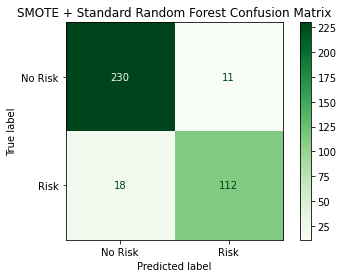

In [57]:
#Create confusion matrix
fig = plot_confusion_matrix(XGB_model, over_X_test, over_y_test, display_labels=['No Risk', 'Risk'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

### SVC

In [70]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
SVC_scores = cross_validate(SVC_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(SVC_scores['test_f1']))
print('Mean recall: %.3f' % mean(SVC_scores['test_recall']))
print('Mean precision: %.3f' % mean(SVC_scores['test_precision']))

#accuracy score
SVC_accuracy_scores = cross_val_score(SVC_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {SVC_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(SVC_accuracy_scores.mean())}')


Mean f1: 0.382
Mean recall: 0.285
Mean precision: 0.589


Scores for each fold are: [0.65322581 0.68548387 0.65591398 0.71505376 0.67204301 0.66935484
 0.69892473 0.69086022 0.67385445 0.65768194]

Average score: 0.677239660


In [68]:
SVC_y_pred = SVC_y_pred.round(0)
SVC_y_pred.astype("int64")

print(classification_report(SVC_y_pred, over_y_test))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       304
           1       0.27      0.52      0.36        67

    accuracy                           0.66       371
   macro avg       0.57      0.60      0.56       371
weighted avg       0.76      0.66      0.69       371



C:\Users\Tinul Piumika\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


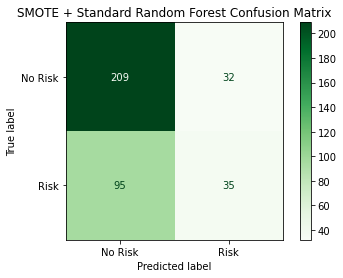

In [69]:
#Create confusion matrix
fig = plot_confusion_matrix(SVC_model, over_X_test, over_y_test, display_labels=['No Risk', 'Risk'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

### GNB

In [59]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
GNB_scores = cross_validate(GNB_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(GNB_scores['test_f1']))
print('Mean recall: %.3f' % mean(GNB_scores['test_recall']))
print('Mean precision: %.3f' % mean(GNB_scores['test_precision']))

#accuracy score
GNB_accuracy_scores = cross_val_score(GNB_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {GNB_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(GNB_accuracy_scores.mean())}')


Mean f1: 0.538
Mean recall: 0.487
Mean precision: 0.603


Scores for each fold are: [0.69354839 0.71505376 0.67741935 0.76612903 0.7016129  0.68010753
 0.74731183 0.6827957  0.71967655 0.68733154]

Average score: 0.707098658


In [60]:
GNB_y_pred = GNB_y_pred.round(0)
GNB_y_pred.astype("int64")

print(classification_report(GNB_y_pred, over_y_test))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       265
           1       0.46      0.57      0.51       106

    accuracy                           0.69       371
   macro avg       0.64      0.65      0.64       371
weighted avg       0.71      0.69      0.70       371



C:\Users\Tinul Piumika\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


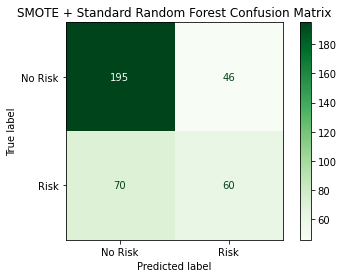

In [61]:
#Create confusion matrix
fig = plot_confusion_matrix(GNB_model, over_X_test, over_y_test, display_labels=['No Risk', 'Risk'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

### DTC

In [52]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision','accuracy')
#Evaluate SMOTE SRF model
DTC_scores = cross_validate(DTC_model, over_X, over_y, scoring=scoring, cv=cv)

#Get average evaluation metrics
print('Mean f1: %.3f' % mean(DTC_scores['test_f1']))
print('Mean recall: %.3f' % mean(DTC_scores['test_recall']))
print('Mean precision: %.3f' % mean(DTC_scores['test_precision']))

#accuracy score
DTC_accuracy_scores = cross_val_score(DTC_model, over_X, over_y, cv= skf, scoring="accuracy")
print('\n')
print(f'Scores for each fold are: {DTC_accuracy_scores}')
print(f'\nAverage score: {"{:.9f}".format(DTC_accuracy_scores.mean())}')


Mean f1: 0.664
Mean recall: 0.602
Mean precision: 0.786


Scores for each fold are: [0.75806452 0.76612903 0.82526882 0.77419355 0.79569892 0.75268817
 0.80107527 0.8172043  0.77358491 0.81132075]

Average score: 0.787522824


In [71]:
DTC_y_pred = DTC_y_pred.round(0)
DTC_y_pred.astype("int64")

print(classification_report(DTC_y_pred, over_y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       311
           1       0.46      1.00      0.63        60

    accuracy                           0.81       371
   macro avg       0.73      0.89      0.75       371
weighted avg       0.91      0.81      0.83       371



C:\Users\Tinul Piumika\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


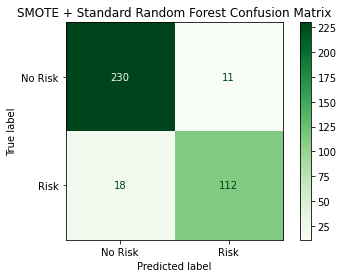

In [57]:
#Create confusion matrix
fig = plot_confusion_matrix(DTV_model, over_X_test, over_y_test, display_labels=['No Risk', 'Risk'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

# exp

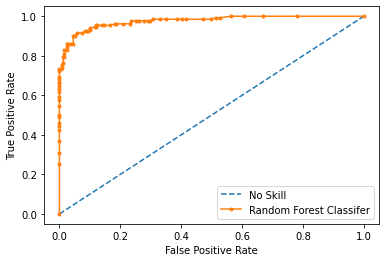

In [16]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

yhat = RFC_model.predict_proba(over_X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(over_y_test, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Random Forest Classifer')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()